# code=5

In [1]:
# import modeles
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import keras   #using keras libraray we can build cnn


# loading data

In [2]:
import tensorflow.keras as tk #to download dataset from keras database
# download dataset txain and test data set from keras database
(x_train, y_train), (x_test, y_test)=keras.datasets.fashion_mnist.load_data()

# to store the labels of the data

In [18]:
class_labels=["T-shirt/top","Trouser","Pullover","Dress","coat","Sandel","Shirt","Sneaker","Bag","Ankle boot"]
# this if the list of labels

# chain the dimention. CNN input data should in 4Dimentional

In [4]:
# we have to convert our data in to 4 dimention 
# because cnn model need in 4D to train

# througn .expand_dims() method we can change the dimention of data or an array
x_train=np.expand_dims(x_train, -1)       #takes first argument dataset and 
                                          #second argument is rows and columns in array   
# x_test=np.expand_dims(x_test, -1)    

# feature scaling

In [5]:
# before sacling we have data between 0 to 255 
# after sacling we will get data between 0 to 1 by dividing each and every cell with 255

x_train= x_train/255
x_test= x_test/255

print("after scaling*********************************************************")
print(x_train[0])

after scaling*********************************************************
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.     

# validation data to train while traning

In [6]:
# we have to split some data from traning data to test model while traning
# to get validation data

# we have to import sklearn sub module
from sklearn.model_selection import train_test_split #to split data
x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, test_size=0.2, random_state=2020)

# shape of x_val and y_val
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


# building convolutional Neural Network

In [7]:
# To build cnn model we have to import kesar library
# And then load models from keras
# and the call the sequential() method
# we have to put several layers inside sequential layer

model=keras.models.Sequential([
#     adding first layer means using dataset we will perforn convolutional operation
#     convolutional layer
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding="valid", activation="relu", input_shape=[28,28,1]),
# second layer
#     max pooling
    keras.layers.MaxPooling2D(pool_size=(2,2)), #for downsampling
# 3rd layer
    keras.layers.Flatten(), #this will flatten every image in single vector
    
#     to train neural networ we have to use dense layer
#     input layer
    keras.layers.Dense(units=128 , activation="relu"),
    
#     output layer
    keras.layers.Dense(units=10 , activation="softmax"),
    
])

# to check the summery of the model

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

# to complie model

In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

# train model

In [10]:
# to train model we have to write name of model and fit function
# we have to pass two parameters
model.fit(x_train,y_train , epochs=10, batch_size=512,verbose=1, validation_data=(x_val,y_val))

Epoch 1/10
94/94 [==============================] - 9s 89ms/step - loss: 0.6466 - accuracy: 0.7806 - val_loss: 0.4231 - val_accuracy: 0.8527
Epoch 2/10
94/94 [==============================] - 8s 88ms/step - loss: 0.3816 - accuracy: 0.8658 - val_loss: 0.3680 - val_accuracy: 0.8737
Epoch 3/10
94/94 [==============================] - 8s 88ms/step - loss: 0.3360 - accuracy: 0.8815 - val_loss: 0.3456 - val_accuracy: 0.8772
Epoch 4/10
94/94 [==============================] - 8s 89ms/step - loss: 0.3012 - accuracy: 0.8938 - val_loss: 0.3213 - val_accuracy: 0.8869
Epoch 5/10
94/94 [==============================] - 9s 91ms/step - loss: 0.2822 - accuracy: 0.9005 - val_loss: 0.3025 - val_accuracy: 0.8958
Epoch 6/10
94/94 [==============================] - 9s 93ms/step - loss: 0.2629 - accuracy: 0.9075 - val_loss: 0.2958 - val_accuracy: 0.8964
Epoch 7/10
94/94 [==============================] - 9s 94ms/step - loss: 0.2500 - accuracy: 0.9108 - val_loss: 0.2967 - val_accuracy: 0.8949
Epoch 8/10
94

# test the model

In [11]:
# model.predict(x_test[0]) #this will occur the error
# we have to give 4 dimention data to model 
# x_test=np.expand_dims(x_test, axis=0) #now this ie 4 dimention data we can assign to model

model.predict(np.expand_dims(x_test[0], axis=0)).round(2)
# the below array discribe the labels to match with 
# the item at index[0] relates the 9 label and model is 99% sure about it.

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97]],
      dtype=float32)

# to find maximum predicted value out of all predictions according to labels

In [12]:
np.argmax(model.predict(np.expand_dims(x_test[0], axis=0)).round(2))

9

In [13]:
y_test[0] # cross checking this is actual label of the item intest data at [0] index 

9

In [14]:
# test on may images from test dataset
y_pred=model.predict(x_test).round(2)
y_pred

array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.13, 0.02, 0.  ]], dtype=float32)

# evalute model with (x_test,y_test)

In [15]:
# to check the accuracy of model at test dataset
model.evaluate(x_test, y_test)
# 89.48% accuracy this means our model is good to diliver
# not over fitting not under fitting

313/313 [==============================] - 1s 3ms/step - loss: 0.2758 - accuracy: 0.9005


[0.27579519152641296, 0.9004999995231628]

# Visualize output

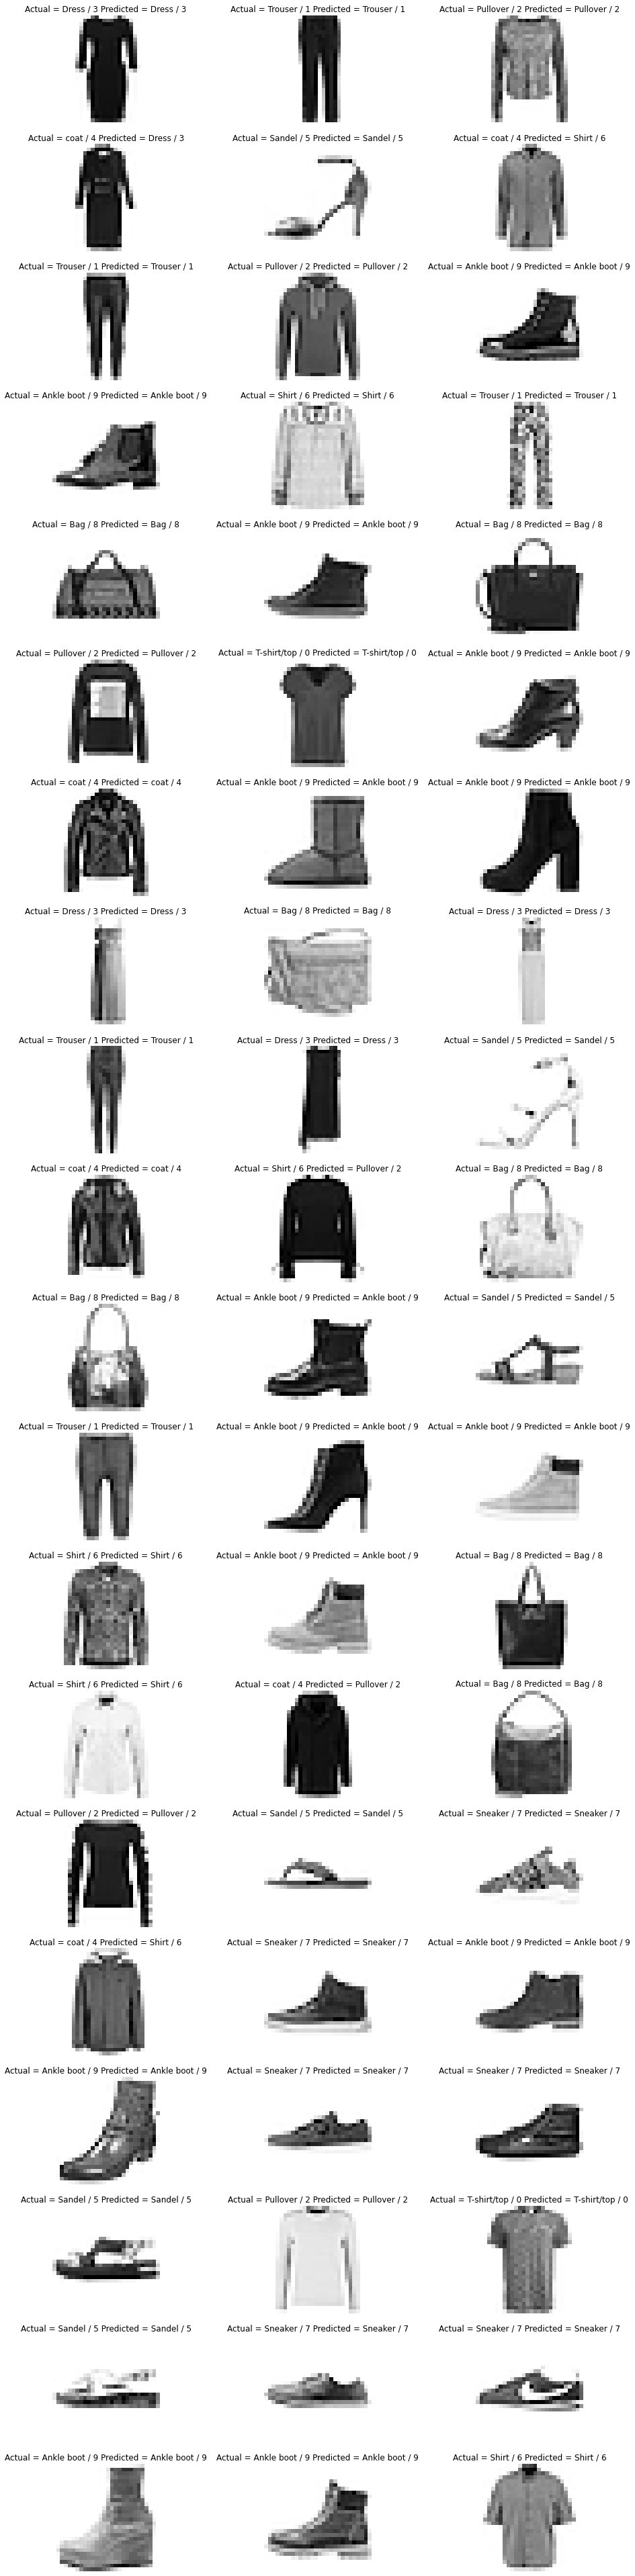

In [34]:
plt.figure(figsize=(16,70))
j=1
for i in np.random.randint(0,10000,60):
    plt.subplot(20,3,j); j +=1
    plt.imshow(x_test[i].reshape(28,28),cmap="Greys")
    plt.title("Actual = {} / {} Predicted = {} / {}".format(class_labels[y_test[i]], y_test[i],class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
    plt.axis('off')